In [105]:
# 📦 Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn.preprocessing as pp
# 📁 Set Working Directory
os.chdir('C:/wamp64/www/CSCN-8000-AI_algorithms_and_mathematics/Week_9')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Data Preprocessing
Load the dataset

In [106]:
# 📄 Load Dataset
study_JS = pd.read_csv('housing_dataset.csv')
study_JS.head()
study_JS.shape

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN


(20640, 10)

## Handle Missing Values

In [107]:
study_JS = study_JS.dropna()
study_JS.shape



(20173, 10)

In [108]:
# 🧼 Drop Missing Values
study = study.dropna()
study.shape

#reIndex after dropping rows with missing values
study = study.reset_index(drop=True)
study_JS.head(10)

(20173, 16)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN
5,-122.32,37.93,33.0,296.0,73.0,216.0,63.0,2.6750,22500.0,NEAR BAY
6,-116.57,35.43,8.0,9975.0,1743.0,6835.0,1439.0,2.7138,22500.0,INLAND
7,-117.16,32.71,52.0,845.0,451.0,1230.0,375.0,1.0918,22500.0,NEAR OCEAN
8,-121.29,37.95,52.0,107.0,79.0,167.0,53.0,0.7917,22500.0,INLAND
9,-114.65,32.79,21.0,44.0,33.0,64.0,27.0,0.8571,25000.0,INLAND


<Axes: >

Text(0.5, 1.0, 'Boxplot of House Value')

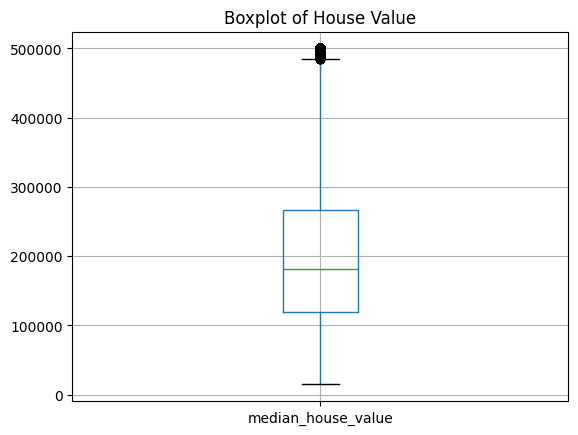

In [109]:
# 📈 Boxplot of Median House Value
study_JS.boxplot(column="median_house_value")
plt.title("Boxplot of House Value")
plt.show()

# 📐 IQR Calculation

In [110]:
Q1, Q3 = np.percentile(study["median_house_value"], [25, 75])
IQR = Q3 - Q1
IQR
mean = np.mean(study["median_house_value"])
threshold = mean - 1.75 * IQR

print(f"IQR: {IQR}")
print(f"Mean: {mean}")
print(f"Outlier Threshold (Low): {threshold}")

clean_1_study_JS = study_JS[study_JS["median_house_value"] <= threshold]
clean_1_study_JS.shape

study_JS = clean_1_study_JS


np.float64(145900.0)

IQR: 145900.0
Mean: 207753.8564913498
Outlier Threshold (Low): -47571.14350865019


(0, 10)

## Explore Inconsistencies

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Diff


AttributeError: Line2D.set() got an unexpected keyword argument 'edgecolor'

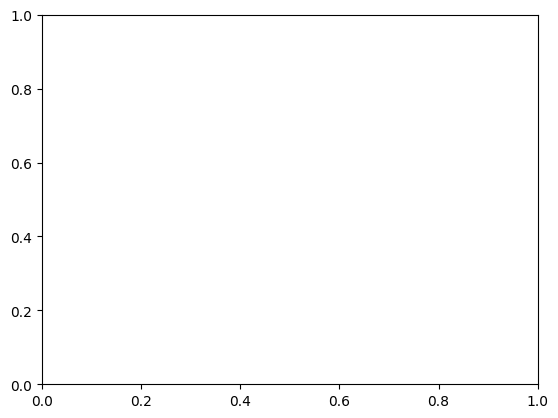

In [ ]:
#Look at Total number of rooms compared to total bedrooms
## Load Inconsistencies
study_JS['Diff'] = study_JS['total_rooms'] - study_JS['total_bedrooms']
study_JS.head()

study_JS['Diff'].plot(kind='hist', color='blue', edgecolor='black')
plt.title('Histogram of Difference between Total Rooms and Total Bedrooms')
plt.xlabel('Difference (Total Rooms - Total Bedrooms)')
plt.ylabel('Frequency')
plt.show()


## Encode Categorical Data

In [ ]:
study_JS = pd.get_dummies(study_JS, columns=['ocean_proximity'])
study_JS.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Diff


# 🚨 Detect Low Outliers

In [ ]:

low_outliers = study[study["median_house_value"] < threshold]
print(f"Low-value outliers: {low_outliers.shape[0]}")

Low-value outliers: 0


<Axes: xlabel='median_house_value', ylabel='Count'>

Text(0.5, 1.0, 'House Value Distribution with Outlier Threshold')

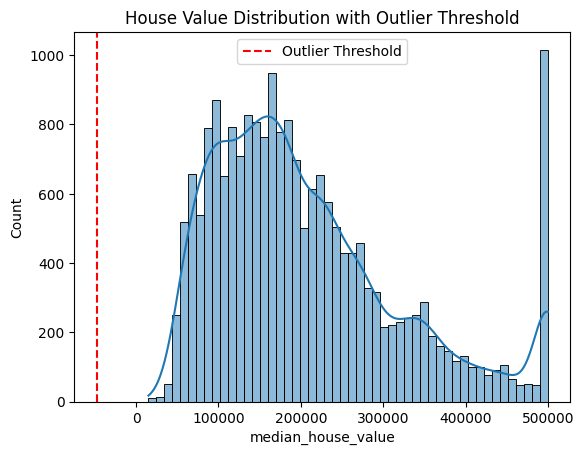

In [ ]:
# 📉 Visualize Distribution with Threshold
sns.histplot(study["median_house_value"], bins=50, kde=True)
plt.axvline(threshold, color='red', linestyle='--', label='Outlier Threshold')
plt.legend()
plt.title("House Value Distribution with Outlier Threshold")
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Total Rooms')

Text(0, 0.5, 'Total Bedrooms')

Text(0.5, 1.0, 'Total Rooms vs. Total Bedrooms')

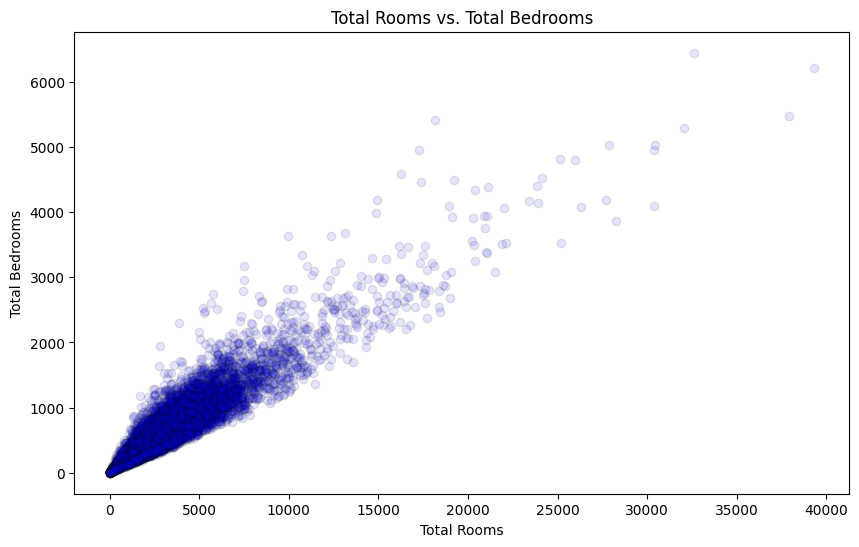

In [ ]:
# 🔍 Scatterplot: total_rooms vs total_bedrooms
plt.figure(figsize=(10,6))
plt.scatter(study['total_rooms'], study['total_bedrooms'], alpha=0.1, color='blue', edgecolor='black')
plt.xlabel('Total Rooms')
plt.ylabel('Total Bedrooms')
plt.title('Total Rooms vs. Total Bedrooms')
plt.show()

In [ ]:
# 🧠 One-Hot Encode 'ocean_proximity'
study = pd.get_dummies(study, columns=['ocean_proximity'])
study.groupby('ocean_proximity')['median_house_value'].mean()
study.head()

KeyError: "None of [Index(['ocean_proximity'], dtype='object')] are in the [columns]"

In [ ]:
# 🔧 Convert Boolean Columns to Integers
bl_col = study.select_dtypes(include='bool').columns
study[bl_col] = study[bl_col].astype(int)
study.dtypes

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN       int64
ocean_proximity_INLAND          int64
ocean_proximity_ISLAND          int64
ocean_proximity_NEAR BAY        int64
ocean_proximity_NEAR OCEAN      int64
ocean_proximity_NEAR_bay        int64
ocean_proximity_inland          int64
dtype: object

In [ ]:
# ✅ Convert Boolean Columns to Integers
bl_col = study.select_dtypes(include='bool').columns
study[bl_col] = study[bl_col].astype(int)

# 🗑️ Drop 'Diff' Column
# study = study.drop('Diff', axis=1)

# 🔄 MinMax Scaling for All Numeric Features
from sklearn.preprocessing import MinMaxScaler
scaler = pp.MinMaxScaler()

# Apply scaler to entire DataFrame
study_scaled = scaler.fit_transform(study)

# 🔁 Reconstruct DataFrame with original column names
study = pd.DataFrame(study_scaled, columns=study.columns)

# 🔍 Preview Scaled Data
study.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,ocean_proximity_NEAR_bay,ocean_proximity_inland
0,0.160359,0.761955,0.294118,0.006435,0.011173,0.002298,0.006085,0.080054,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.730080,0.410202,0.352941,0.015693,0.036934,0.013649,0.026805,0.110350,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.646414,0.180659,1.000000,0.020372,0.041279,0.017517,0.036836,0.254707,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.117530,0.825717,0.686275,0.002442,0.004190,0.000420,0.001151,0.002490,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.599602,0.171095,0.745098,0.012488,0.025916,0.007175,0.022529,0.128743,0.005157,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 📊 Housing Prices by Proximity

# Group by 'ocean_proximity' and calculate mean house value
cm = clean_1_study.groupby('ocean_proximity')['median_house_value'].mean().reset_index()

#study['ocean_proximity'] = np.where(study['ocean_proximity'] == "NEAR_bay","NEAR_BAY",study['ocean_proximity'])   

# Rename columns for clarity
cm.columns = ['ocean_proximity', 'median_house_value']

# Sort by house value descending
cm = cm.sort_values(by='median_house_value', ascending=False)

# Display the summary table
print(cm)

# 📈 Bar Chart Visualization
plt.bar(cm['ocean_proximity'], cm['median_house_value'], width=0.8, color='blue', edgecolor='black')
plt.title('House Value by Proximity')
plt.xlabel('Proximity to Ocean')
plt.ylabel('House Values')
plt.show()

NameError: name 'clean_1_study' is not defined